Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from
overall market sentiment (fear vs greed). Identify hidden trends or signals that could influence
smarter trading strategies.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
df = pd.read_csv('fear_greed.csv')

Loads the dataset and previews the first few rows.

In [ ]:
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Convert the 'timestamp' column correctly using unit='s'
df['timestamp_datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Convert the 'date' column to datetime objects as well (good practice)
df['date_datetime'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,timestamp,value,classification,date,timestamp_datetime,date_datetime
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00,2018-02-05


In [ ]:
df.head(20)

,timestamp,value,classification,date,timestamp_datetime,date_datetime
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06,2018-02-06 05:30:00,2018-02-06
6,1517981400,36,Fear,2018-02-07,2018-02-07 05:30:00,2018-02-07
7,1518067800,30,Fear,2018-02-08,2018-02-08 05:30:00,2018-02-08
8,1518154200,44,Fear,2018-02-09,2018-02-09 05:30:00,2018-02-09
9,1518240600,54,Neutral,2018-02-10,2018-02-10 05:30:00,2018-02-10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           2644 non-null   int64         
 1   value               2644 non-null   int64         
 2   classification      2644 non-null   object        
 3   date                2644 non-null   object        
 4   timestamp_datetime  2644 non-null   datetime64[ns]
 5   date_datetime       2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 124.1+ KB


In [ ]:
df.drop(['timestamp', 'date'], axis=1, inplace=True)

In [ ]:
df

,value,classification,timestamp_datetime,date_datetime
0,30,Fear,2018-02-01 05:30:00,2018-02-01
1,15,Extreme Fear,2018-02-02 05:30:00,2018-02-02
2,40,Fear,2018-02-03 05:30:00,2018-02-03
3,24,Extreme Fear,2018-02-04 05:30:00,2018-02-04
4,11,Extreme Fear,2018-02-05 05:30:00,2018-02-05
...,...,...,...,...
2639,54,Neutral,2025-04-28 05:30:00,2025-04-28
2640,60,Greed,2025-04-29 05:30:00,2025-04-29
2641,56,Greed,2025-04-30 05:30:00,2025-04-30
2642,53,Neutral,2025-05-01 05:30:00,2025-05-01


In [ ]:
df.isnull().sum()

,0
value,0
classification,0
timestamp_datetime,0
date_datetime,0


In [ ]:
df.drop_duplicates(keep = 'first')

,value,classification,timestamp_datetime,date_datetime
0,30,Fear,2018-02-01 05:30:00,2018-02-01
1,15,Extreme Fear,2018-02-02 05:30:00,2018-02-02
2,40,Fear,2018-02-03 05:30:00,2018-02-03
3,24,Extreme Fear,2018-02-04 05:30:00,2018-02-04
4,11,Extreme Fear,2018-02-05 05:30:00,2018-02-05
...,...,...,...,...
2639,54,Neutral,2025-04-28 05:30:00,2025-04-28
2640,60,Greed,2025-04-29 05:30:00,2025-04-29
2641,56,Greed,2025-04-30 05:30:00,2025-04-30
2642,53,Neutral,2025-05-01 05:30:00,2025-05-01


In [ ]:
df.describe()

,value,timestamp_datetime,date_datetime
count,2644.000000,2644,2644
mean,46.981089,2021-09-17 17:14:45.022693120,2021-09-17 11:44:45.022692864
min,5.000000,2018-02-01 05:30:00,2018-02-01 00:00:00
25%,28.000000,2019-11-26 23:30:00,2019-11-26 18:00:00
50%,46.000000,2021-09-17 17:30:00,2021-09-17 12:00:00
75%,66.000000,2023-07-10 11:30:00,2023-07-10 06:00:00
max,95.000000,2025-05-02 05:30:00,2025-05-02 00:00:00
std,21.827680,NaN,NaN


In [ ]:
df.describe(include='object')

,classification
count,2644
unique,5
top,Fear
freq,781


Data Summary

    2,644 records spanning from February 2018 to May 2025

    Key columns:

        value: Fear & Greed Index score (5-95)

        classification: Categorical label (Extreme Fear, Fear, Neutral, Greed, Extreme Greed)

  Data Quality:

    No missing values in any columns

    No duplicate records found

  Descriptive Statistics:

    Mean index value: 46.98 (slightly leaning toward Fear)

    Standard deviation: 21.83 (significant volatility in sentiment)

    Value range: 5 (Extreme Fear) to 95 (Extreme Greed)

    Most common classification: "Fear" (781 occurrences)

In [ ]:
df1 = pd.read_csv('historical_data.csv')

In [ ]:
df1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [ ]:
sentiment_times = df['timestamp_datetime'].dt.time

Converting unix timestamp to human readable date

In [ ]:
unique_times = sentiment_times.unique()

In [ ]:
unique_times

array([datetime.time(5, 30)], dtype=object)

In [ ]:
df.drop(['timestamp_datetime'], axis=1, inplace=True)

In [ ]:
df

,value,classification,date_datetime
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05
...,...,...,...
2639,54,Neutral,2025-04-28
2640,60,Greed,2025-04-29
2641,56,Greed,2025-04-30
2642,53,Neutral,2025-05-01


In [ ]:
sentiment_df = df.set_index('date_datetime')

In [ ]:
sentiment_df

,value,classification
date_datetime,,
2018-02-01,30,Fear
2018-02-02,15,Extreme Fear
2018-02-03,40,Fear
2018-02-04,24,Extreme Fear
2018-02-05,11,Extreme Fear
...,...,...
2025-04-28,54,Neutral
2025-04-29,60,Greed
2025-04-30,56,Greed


In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2644 entries, 2018-02-01 to 2025-05-02
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   value           2644 non-null   int64 
 1   classification  2644 non-null   object
dtypes: int64(1), object(1)
memory usage: 62.0+ KB


In [ ]:
classification_counts = sentiment_df['classification'].value_counts().sort_index() # Sort by the defined category order
classification_percentages = sentiment_df['classification'].value_counts(normalize=True).mul(100).sort_index()

In [ ]:
print("Counts:")
print(classification_counts)
print("\nPercentages:")
print(classification_percentages.round(2))


Counts:
classification
Extreme Fear     508
Extreme Greed    326
Fear             781
Greed            633
Neutral          396
Name: count, dtype: int64

Percentages:
classification
Extreme Fear     19.21
Extreme Greed    12.33
Fear             29.54
Greed            23.94
Neutral          14.98
Name: proportion, dtype: float64


Dominant Sentiment:

    Fear is the most prevalent sentiment, accounting for the highest count (781) and the largest proportion (29.54%) of the observations.

    Greed follows as the second most common sentiment, with 633 occurrences and 23.94% of the total.

Lesser Sentiments:

    Extreme Fear and Neutral represent a moderate portion, with 508 (19.21%) and 396 (14.98%) observations respectively.

    Extreme Greed is the least frequent sentiment, with only 326 observations, making up 12.33% of the total.

/tmp/ipython-input-69-1068364322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classification_counts.index, y=classification_counts.values, palette='viridis')


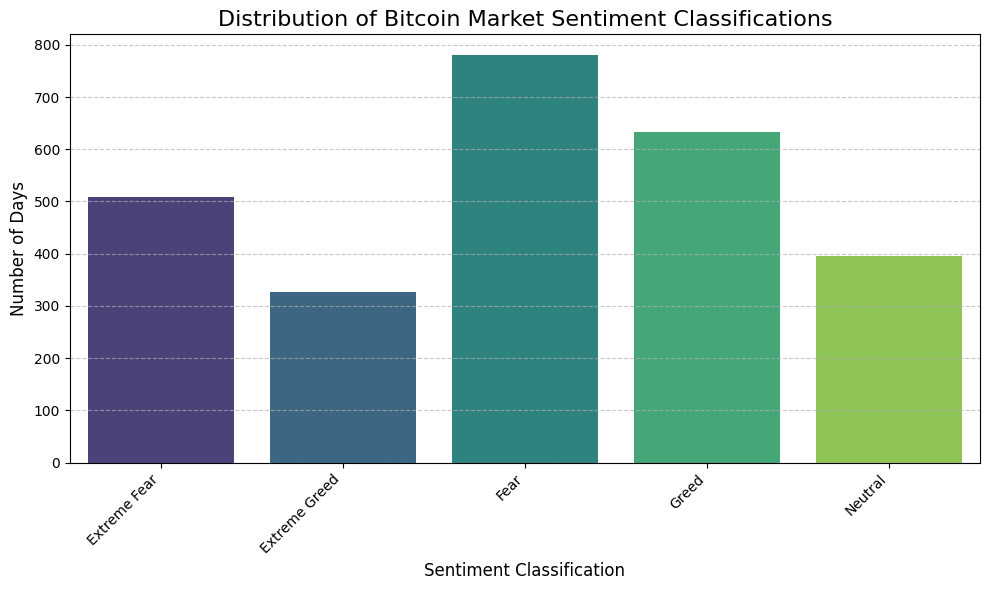

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_counts.index, y=classification_counts.values, palette='viridis')
plt.title('Distribution of Bitcoin Market Sentiment Classifications', fontsize=16)
plt.xlabel('Sentiment Classification', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot highlights that 'Fear' is the most frequent classification, followed by 'Greed', while 'Extreme Greed' is the least common.


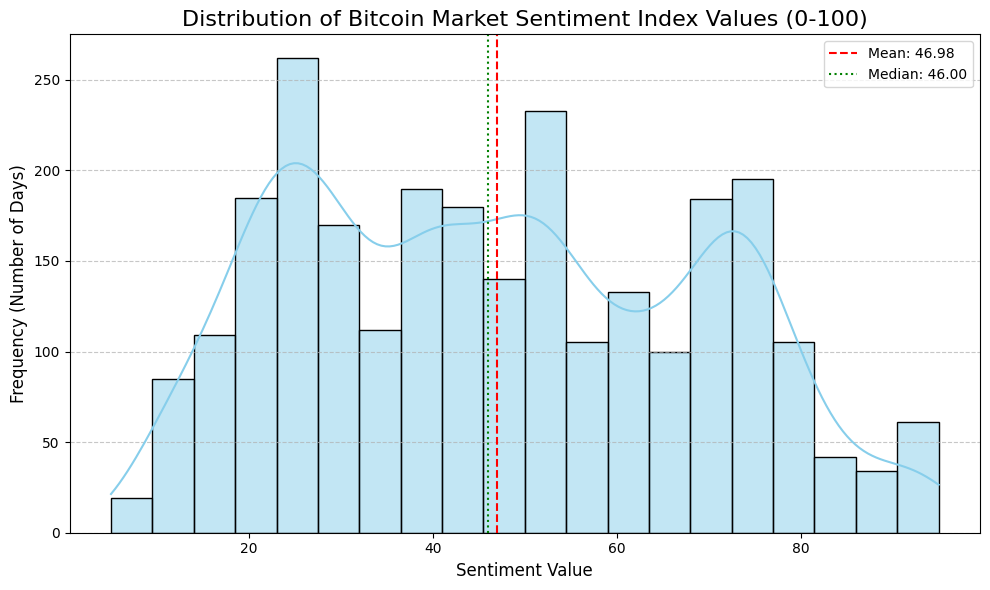

In [ ]:
# Visualize the distribution of sentiment values (histogram with KDE)
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_df['value'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Bitcoin Market Sentiment Index Values (0-100)', fontsize=16)
plt.xlabel('Sentiment Value', fontsize=12)
plt.ylabel('Frequency (Number of Days)', fontsize=12)
plt.axvline(sentiment_df['value'].mean(), color='red', linestyle='--', label=f'Mean: {sentiment_df["value"].mean():.2f}')
plt.axvline(sentiment_df['value'].median(), color='green', linestyle=':', label=f'Median: {sentiment_df["value"].median():.2f}')
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Multiple peaks = market sentiment has distinct clusters, possibly switching between fear/greed extremes.

/tmp/ipython-input-71-1370825801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='value', data=sentiment_df, palette='muted')


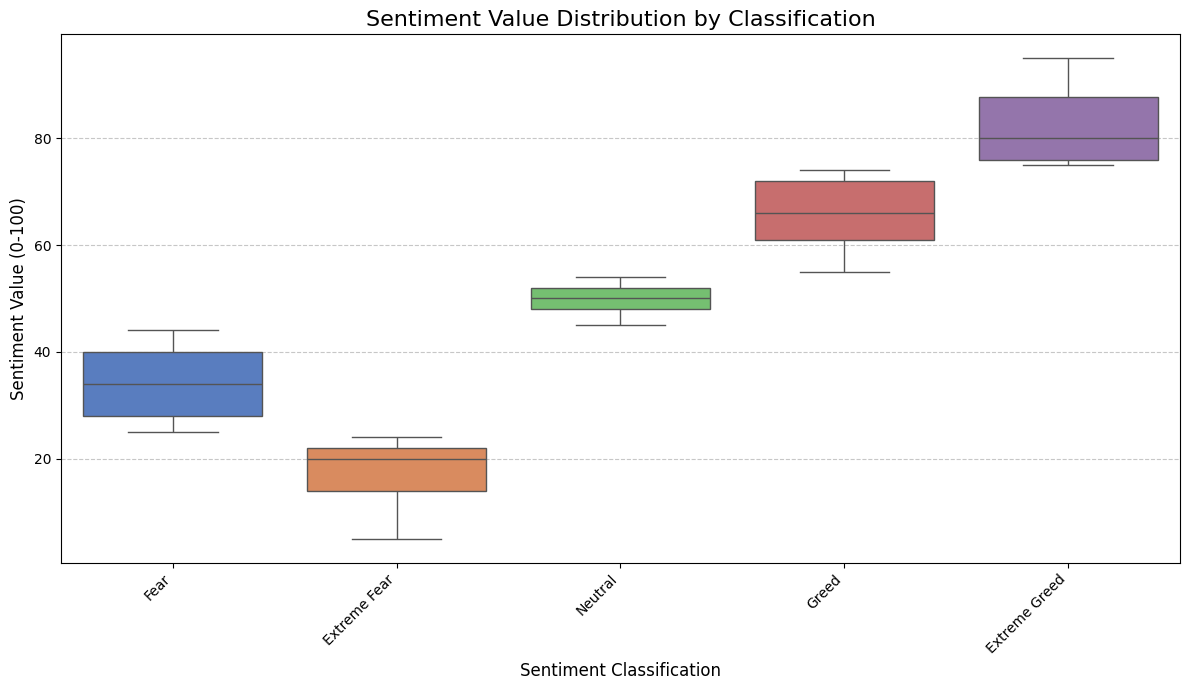

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='value', data=sentiment_df, palette='muted')
plt.title('Sentiment Value Distribution by Classification', fontsize=16)
plt.xlabel('Sentiment Classification', fontsize=12)
plt.ylabel('Sentiment Value (0-100)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-72-1068364322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classification_counts.index, y=classification_counts.values, palette='viridis')


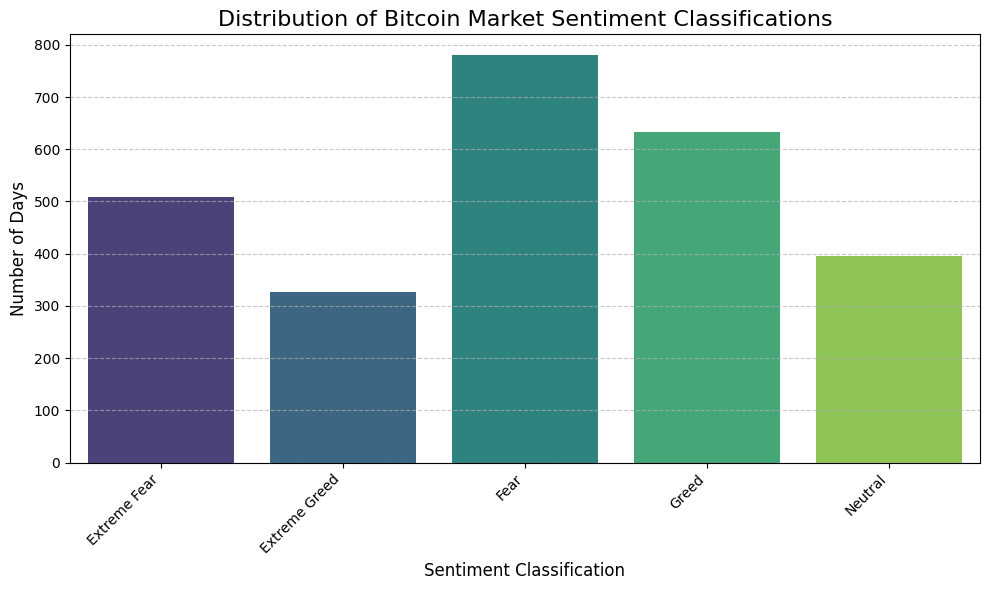

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_counts.index, y=classification_counts.values, palette='viridis')
plt.title('Distribution of Bitcoin Market Sentiment Classifications', fontsize=16)
plt.xlabel('Sentiment Classification', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

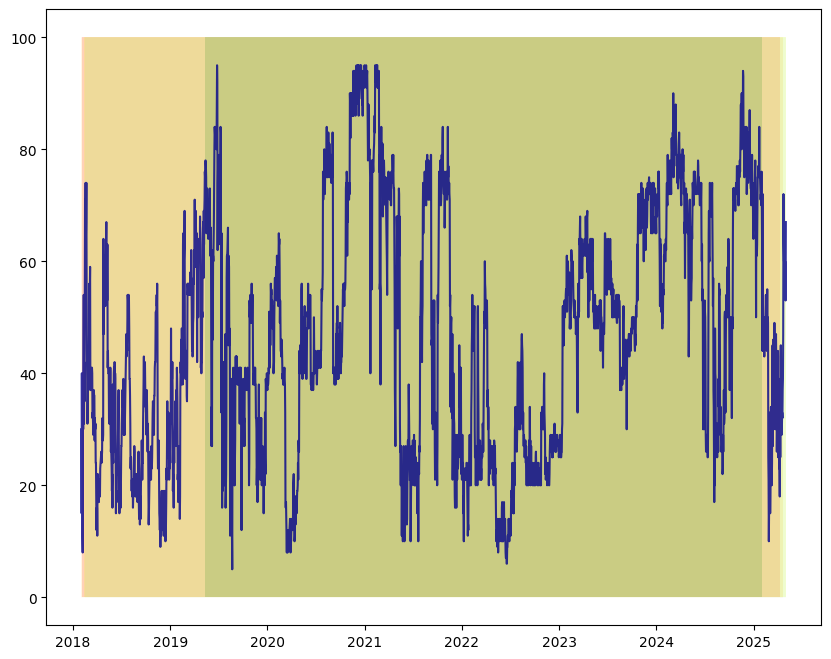

In [ ]:
classification_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
present_classifications = [c for c in classification_order if c in sentiment_df['classification'].unique()]
plt.figure(figsize=(10, 8))

# Plot the sentiment value over time
plt.plot(sentiment_df.index, sentiment_df['value'], label='Sentiment Value', color='darkblue', alpha=0.8, linewidth=1.5)

# Add background shading for classifications
# We map classifications to distinct colors for better visual separation
sentiment_colors_map = {
    'Extreme Fear': '#FF0000',  # Red
    'Fear': '#FFA500',          # Orange
    'Neutral': '#FFFF00',       # Yellow
    'Greed': '#90EE90',         # Light Green
    'Extreme Greed': '#008000'  # Green
}

# Iterate through unique classifications and fill background
for classification_type in classification_order:
    # Check if the classification actually exists in the data
    if classification_type in sentiment_df['classification'].unique():
        # Get data points for the current classification
        class_data = sentiment_df[sentiment_df['classification'] == classification_type]

        # Use fill_between for continuous shading over time
        # We need to use the index directly for the x-axis for fill_between
        # Using .index is generally more robust than sentiment_df.index if class_data is not contiguous
        plt.fill_between(class_data.index, 0, 100, # Fill from 0 to 100 on the y-axis
                         where=class_data['value'].notna(), # Apply only where there is data
                         facecolor=sentiment_colors_map.get(classification_type, 'grey'), # Get color from map, default to grey
                         alpha=0.15, # Transparency level
                         label=f'{classification_type} Period') # Label for legend

In [ ]:
df1['Datetime_UTC'] = pd.to_datetime(df1['Timestamp'], unit='ms', utc=True)

In [ ]:
df1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Datetime_UTC
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20+00:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20+00:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20+00:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20+00:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-06-15 15:06:40+00:00
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-06-15 15:06:40+00:00
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-06-15 15:06:40+00:00
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-06-15 15:06:40+00:00


In [ ]:
df1['Date'] = df1['Datetime_UTC'].dt.normalize()

In [ ]:
df1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Datetime_UTC,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27 00:00:00+00:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27 00:00:00+00:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27 00:00:00+00:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27 00:00:00+00:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-06-15 15:06:40+00:00,2025-06-15 00:00:00+00:00
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-06-15 15:06:40+00:00,2025-06-15 00:00:00+00:00
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-06-15 15:06:40+00:00,2025-06-15 00:00:00+00:00
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-06-15 15:06:40+00:00,2025-06-15 00:00:00+00:00


In [ ]:
df1.drop(columns=['Timestamp', 'Timestamp IST', 'Datetime_UTC'], inplace=True)

In [ ]:
df1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 00:00:00+00:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 00:00:00+00:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 00:00:00+00:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 00:00:00+00:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 00:00:00+00:00
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 00:00:00+00:00
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 00:00:00+00:00
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 00:00:00+00:00


In [ ]:
df1['Date'] = df1['Date'].dt.tz_localize(None).dt.date


In [ ]:
df1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Start Position    211224 non-null  float64
 7   Direction         211224 non-null  object 
 8   Closed PnL        211224 non-null  float64
 9   Transaction Hash  211224 non-null  object 
 10  Order ID          211224 non-null  int64  
 11  Crossed           211224 non-null  bool   
 12  Fee               211224 non-null  float64
 13  Trade ID          211224 non-null  float64
 14  Date              211224 non-null  object 
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 22.8+ MB


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  Date

In [ ]:
df1.set_index('Date', inplace=True)

In [ ]:
df1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID
Date,,,,,,,,,,,,,,
2024-10-27,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14
2024-10-27,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14
2024-10-27,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14
2024-10-27,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15
2024-10-27,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14
2025-06-15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14
2025-06-15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14


In [ ]:
df1_btc = df1[df1['Coin'] == 'BTC'].copy()

Extracting the data with bitcoin transactions.

In [ ]:
df1_btc

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID
Date,,,,,,,,,,,,,,
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.08585,7061.59,BUY,0.00000,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,2.372694,7.470000e+14
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12157,9999.74,BUY,0.08585,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.359912,7.020000e+13
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.00937,770.73,BUY,0.20742,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,0.258964,1.970000e+14
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12372,10176.59,BUY,0.21679,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.419333,1.090000e+15
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,2.64792,217804.66,BUY,0.34051,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,73.182364,3.470000e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-15,0x271b280974205ca63b716753467d5a371de622ab,BTC,92924.0,0.00707,656.97,SELL,-2.23515,Open Short,0.000000,0x6fc378246b558485f40404221b2f6d02063a0097cf6a...,88364448513,False,0.000000,2.950000e+14
2025-06-15,0x271b280974205ca63b716753467d5a371de622ab,BTC,93121.0,0.97184,90498.71,BUY,-2.24222,Close Short,-108.457344,0x796073035ccadfeec08c04221d3e9b0201ad00fbb7f0...,88403549410,True,22.624678,1.040000e+15
2025-06-15,0x271b280974205ca63b716753467d5a371de622ab,BTC,93121.0,0.04149,3863.59,BUY,-1.27038,Close Short,-4.630284,0x796073035ccadfeec08c04221d3e9b0201ad00fbb7f0...,88403549410,True,0.965897,1.430000e+14


In [ ]:
df1_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26064 entries, 2025-02-19 to 2025-06-15
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           26064 non-null  object 
 1   Coin              26064 non-null  object 
 2   Execution Price   26064 non-null  float64
 3   Size Tokens       26064 non-null  float64
 4   Size USD          26064 non-null  float64
 5   Side              26064 non-null  object 
 6   Start Position    26064 non-null  float64
 7   Direction         26064 non-null  object 
 8   Closed PnL        26064 non-null  float64
 9   Transaction Hash  26064 non-null  object 
 10  Order ID          26064 non-null  int64  
 11  Crossed           26064 non-null  bool   
 12  Fee               26064 non-null  float64
 13  Trade ID          26064 non-null  float64
dtypes: bool(1), float64(7), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
df1_btc.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID
count,26064.000000,26064.000000,2.606400e+04,26064.000000,26064.000000,2.606400e+04,26064.000000,2.606400e+04
mean,86454.455801,0.288654,2.471732e+04,6.517446,33.304356,7.320867e+10,5.341629,5.647446e+14
std,13793.586813,1.094169,9.533397e+04,26.903453,526.315543,2.116121e+10,16.993363,3.251715e+14
min,39185.000000,0.000010,4.300000e-01,-133.364800,-29370.119800,4.064975e+09,-1.024799,3.739256e+09
25%,83278.000000,0.005870,5.001100e+02,-0.193980,0.000000,6.877944e+10,0.017001,2.830000e+14
50%,87394.000000,0.029725,2.494740e+03,0.592840,0.000000,8.321500e+10,0.374791,5.630000e+14
75%,95085.000000,0.217892,1.988585e+04,8.177532,1.810533,8.698557e+10,4.499195,8.500000e+14
max,109004.000000,44.663220,3.921431e+06,115.740110,19530.522500,9.014923e+10,837.471593,1.130000e+15


1. Execution Price

    Range: Prices span a wide range, from a minimum of 39,185 to a maximum of 109,004.

    Average & Distribution: The mean price is approximately 86,454.46, which is close to the median (50th percentile) of 87,394. This indicates a fairly even distribution of prices. Half of all trades occurred between 83,278 (25th percentile) and 95,085 (75th percentile).

2. Size Tokens

    Range: Token sizes are highly varied, from a tiny 0.00001 to a massive 44.66.

    Average & Distribution: The mean size is 0.288654, but the median is much lower at 0.029725. This suggests a strong positive skew, meaning most trades involve small token amounts, while a few very large trades pull the average up.

3. Size USD

    Range: Trade sizes in USD range from just 0.43 to a significant 3,921,431.

    Average & Distribution: Similar to token size, the USD value of trades is positively skewed. The median is 2,494.74, which is far below the mean of 24,717.32. This again highlights that most trades are of smaller value, with a few exceptionally large ones.

4. Closed PnL (Profit and Loss)

    Range: PnL values show a wide range, from a loss of -29,370.12 to a profit of 19,530.52.

    Average & Distribution: The mean PnL is a positive 33.30. However, the median is 0.00, indicating that a large portion of trades resulted in a break-even outcome or very small gains/losses. The positive mean is driven by a small number of highly profitable trades.

5. Fee

    Range: Fees range from -1.02 to 837.47. The negative minimum is unusual and could suggest a refund or rebate.

    Average & Distribution: The mean fee is 5.34, but the median is just 0.374791. This strong positive skew means most transactions incur low fees, while a few have very high fees.

In [ ]:
df1_btc.describe(include='object')

,Account,Coin,Side,Direction,Transaction Hash
count,26064,26064,26064,26064,26064
unique,23,1,2,6,10142
top,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,BUY,Open Long,0x00000000000000000000000000000000000000000000...
freq,9173,26064,14260,10799,394


In [ ]:

df1_btc['buy_volume'] = df1_btc.apply(lambda row: row['Size USD'] if row['Side'] == 'BUY' else 0, axis=1)
df1_btc['sell_volume'] = df1_btc.apply(lambda row: row['Size USD'] if row['Side'] == 'SELL' else 0, axis=1)

# IMPORTANT: Update these based on the exact strings in your 'Direction' column
df1_btc['is_long_position'] = df1_btc.apply(lambda row: 1 if row['Direction'] == 'Open Long' or row['Direction'] == 'Close Long' else 0, axis=1)
df1_btc['is_short_position'] = df1_btc.apply(lambda row: 1 if row['Direction'] == 'Open Short' or row['Direction'] == 'Close Short' else 0, axis=1)

In [ ]:
df1_btc

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,buy_volume,sell_volume,is_long_position,is_short_position
Date,,,,,,,,,,,,,,,,,,
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.08585,7061.59,BUY,0.00000,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,2.372694,7.470000e+14,7061.59,0.00,1,0
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12157,9999.74,BUY,0.08585,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.359912,7.020000e+13,9999.74,0.00,1,0
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.00937,770.73,BUY,0.20742,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,0.258964,1.970000e+14,770.73,0.00,1,0
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,0.12372,10176.59,BUY,0.21679,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,3.419333,1.090000e+15,10176.59,0.00,1,0
2025-02-19,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,82255.0,2.64792,217804.66,BUY,0.34051,Open Long,0.000000,0x7757437fee55ca858e3f041fb178b10201d700ac1b50...,80242832045,True,73.182364,3.470000e+13,217804.66,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-15,0x271b280974205ca63b716753467d5a371de622ab,BTC,92924.0,0.00707,656.97,SELL,-2.23515,Open Short,0.000000,0x6fc378246b558485f40404221b2f6d02063a0097cf6a...,88364448513,False,0.000000,2.950000e+14,0.00,656.97,0,1
2025-06-15,0x271b280974205ca63b716753467d5a371de622ab,BTC,93121.0,0.97184,90498.71,BUY,-2.24222,Close Short,-108.457344,0x796073035ccadfeec08c04221d3e9b0201ad00fbb7f0...,88403549410,True,22.624678,1.040000e+15,90498.71,0.00,0,1
2025-06-15,0x271b280974205ca63b716753467d5a371de622ab,BTC,93121.0,0.04149,3863.59,BUY,-1.27038,Close Short,-4.630284,0x796073035ccadfeec08c04221d3e9b0201ad00fbb7f0...,88403549410,True,0.965897,1.430000e+14,3863.59,0.00,0,1


In [ ]:
daily_trader_data = df1_btc.groupby(level='Date').agg(
    total_closedPnL=('Closed PnL', 'sum'),
    total_volume_usd=('Size USD', 'sum'),
    num_trades=('Transaction Hash', 'count'), # Count of rows for the day (each row is a trade)
    avg_execution_price=('Execution Price', 'mean'),
    total_fees=('Fee', 'sum'),
    num_unique_traders=('Account', 'nunique'),
    total_buy_volume_usd=('buy_volume', 'sum'),
    total_sell_volume_usd=('sell_volume', 'sum'),
    num_long_positions=('is_long_position', 'sum'),
    num_short_positions=('is_short_position', 'sum')
)

In [ ]:
daily_trader_data

,total_closedPnL,total_volume_usd,num_trades,avg_execution_price,total_fees,num_unique_traders,total_buy_volume_usd,total_sell_volume_usd,num_long_positions,num_short_positions
Date,,,,,,,,,,
2023-11-14,530.655361,4.654492e+06,227,44601.356828,1163.161618,2,2.350048e+06,2.304444e+06,145,82
2024-03-09,-7853.421683,1.157254e+07,1451,43271.386630,2266.309260,3,5.790077e+06,5.782465e+06,341,1102
2024-07-03,10485.300779,1.375887e+06,217,63454.013825,481.310018,2,6.827009e+05,6.931859e+05,162,55
2024-10-27,104034.937427,3.370609e+07,2072,88207.968147,10698.960668,10,1.714417e+07,1.656192e+07,1318,753
2025-02-19,552113.840180,3.503168e+08,16168,89162.886813,78999.268530,18,1.784517e+08,1.718651e+08,12237,3921
2025-06-15,208733.420574,2.426063e+08,5929,91468.318603,45615.216710,11,1.171083e+08,1.254980e+08,4172,1756


Significant Growth: The data points towards a substantial increase in trading volume, number of trades, and unique traders from late 2023 to early 2025, with 2025-02-19 being a particularly high-activity and profitable day.

Profitability Varies: While overall profitability can be high (e.g., 2025-02-19), there are also periods of losses (e.g., 2024-03-09).

Market Sentiment: The market generally seems to favor long positions, indicating a predominant bullish outlook, although there are specific days (like 2024-03-09) where short interest becomes more prominent, possibly coinciding with market downturns or specific strategies.

Volume-Fee Correlation: Higher trading activity (volume and trades) directly leads to higher fees generated.

In [ ]:
daily_trader_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-11-14 to 2025-06-15
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_closedPnL        6 non-null      float64
 1   total_volume_usd       6 non-null      float64
 2   num_trades             6 non-null      int64  
 3   avg_execution_price    6 non-null      float64
 4   total_fees             6 non-null      float64
 5   num_unique_traders     6 non-null      int64  
 6   total_buy_volume_usd   6 non-null      float64
 7   total_sell_volume_usd  6 non-null      float64
 8   num_long_positions     6 non-null      int64  
 9   num_short_positions    6 non-null      int64  
dtypes: float64(6), int64(4)
memory usage: 528.0 bytes


In [ ]:
daily_trader_data.describe()

,total_closedPnL,total_volume_usd,num_trades,avg_execution_price,total_fees,num_unique_traders,total_buy_volume_usd,total_sell_volume_usd,num_long_positions,num_short_positions
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000
mean,144674.122106,1.073720e+08,4344.000000,70027.655141,23204.037801,7.666667,5.358783e+07,5.378419e+07,3062.500000,1278.166667
std,216245.643334,1.507984e+08,6161.695416,22636.210957,32287.015110,6.470446,7.571376e+07,7.515910e+07,4749.252352,1445.453481
min,-7853.421683,1.375887e+06,217.000000,43271.386630,481.310018,2.000000,6.827009e+05,6.931859e+05,145.000000,55.000000
25%,3019.316716,6.384005e+06,533.000000,49314.521077,1438.948529,2.250000,3.210055e+06,3.173949e+06,206.750000,249.750000
50%,57260.119103,2.263931e+07,1761.500000,75830.990986,6482.634964,6.500000,1.146712e+07,1.117219e+07,829.500000,927.500000
75%,182558.799787,1.903813e+08,4964.750000,88924.157147,36886.152700,10.750000,9.211726e+07,9.826399e+07,3458.500000,1592.500000
max,552113.840180,3.503168e+08,16168.000000,91468.318603,78999.268530,18.000000,1.784517e+08,1.718651e+08,12237.000000,3921.000000


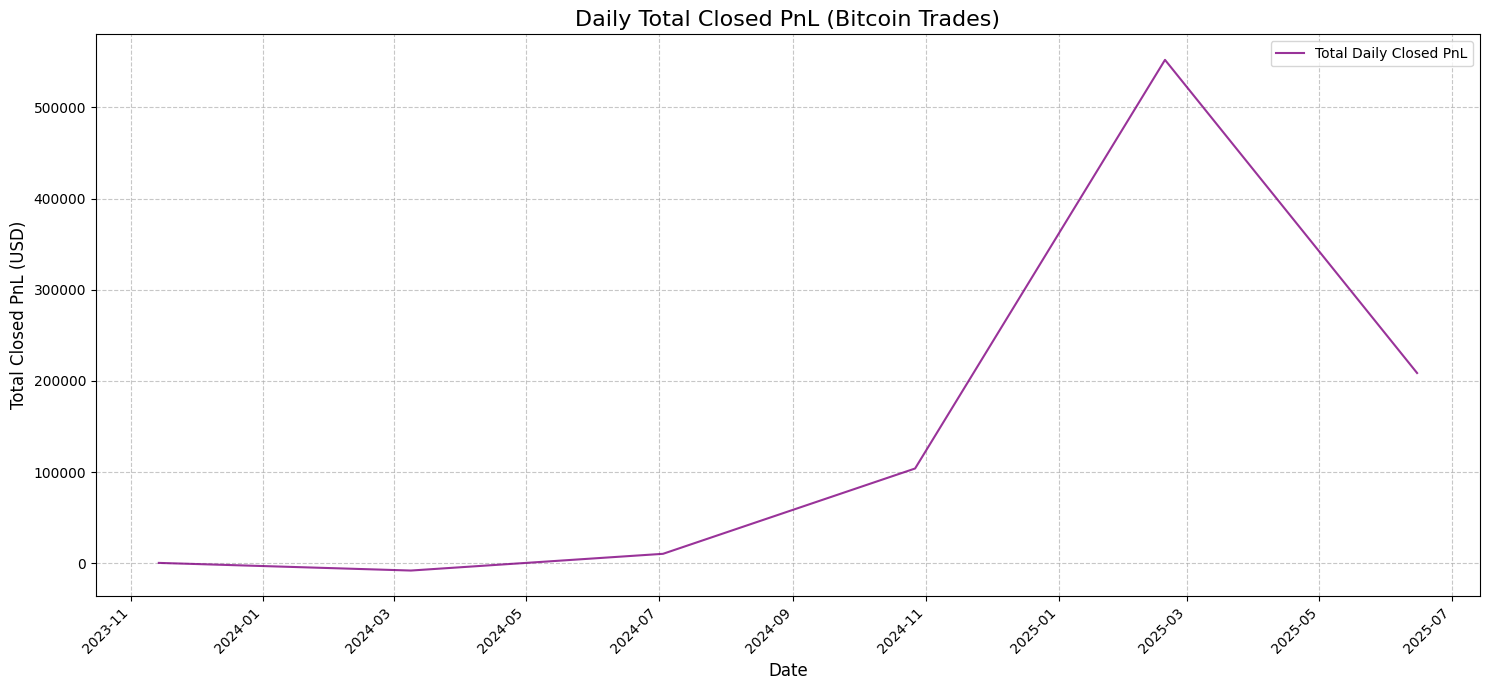

In [ ]:

# Plot Daily Total Closed PnL
plt.figure(figsize=(15, 7))
plt.plot(daily_trader_data.index, daily_trader_data['total_closedPnL'], label='Total Daily Closed PnL', color='purple', alpha=0.8)
plt.title('Daily Total Closed PnL (Bitcoin Trades)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Closed PnL (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The net profit is maximum in the first quarter of 2025 and then declines.

Text(0, 0.5, 'Frequency')

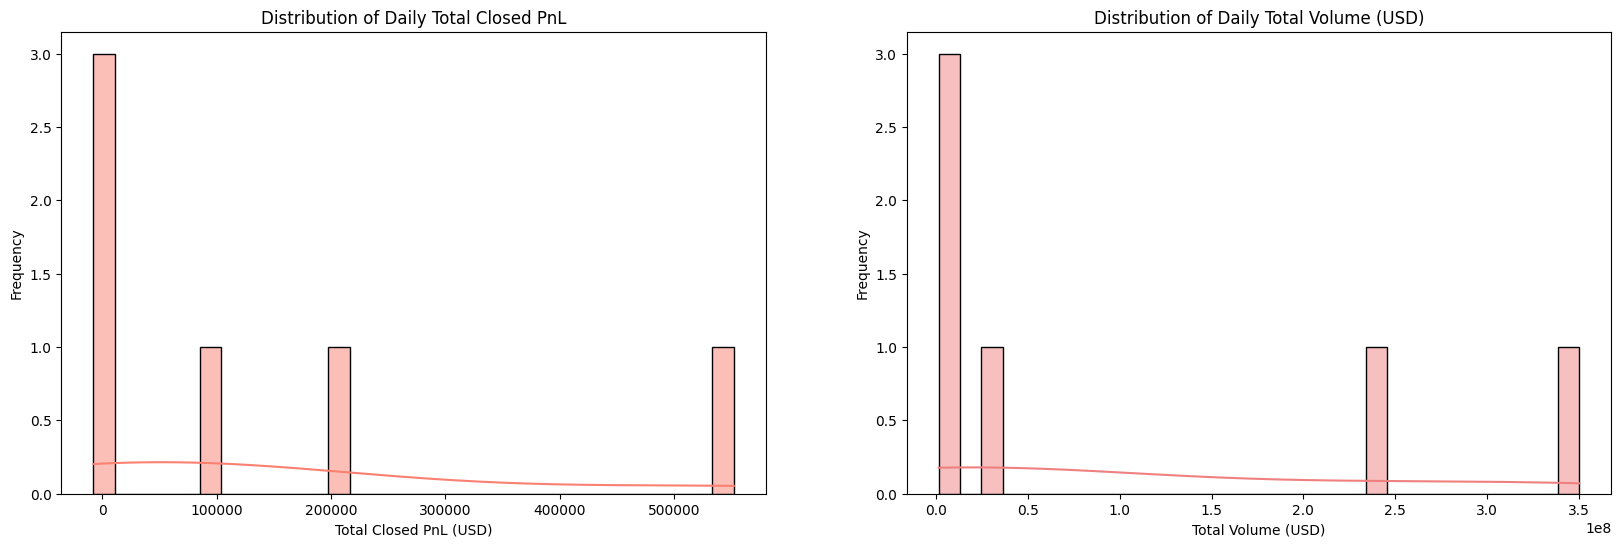

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(daily_trader_data['total_closedPnL'], bins=30, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Distribution of Daily Total Closed PnL')
axes[0].set_xlabel('Total Closed PnL (USD)')
axes[0].set_ylabel('Frequency')

sns.histplot(daily_trader_data['total_volume_usd'], bins=30, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Daily Total Volume (USD)')
axes[1].set_xlabel('Total Volume (USD)')
axes[1].set_ylabel('Frequency')


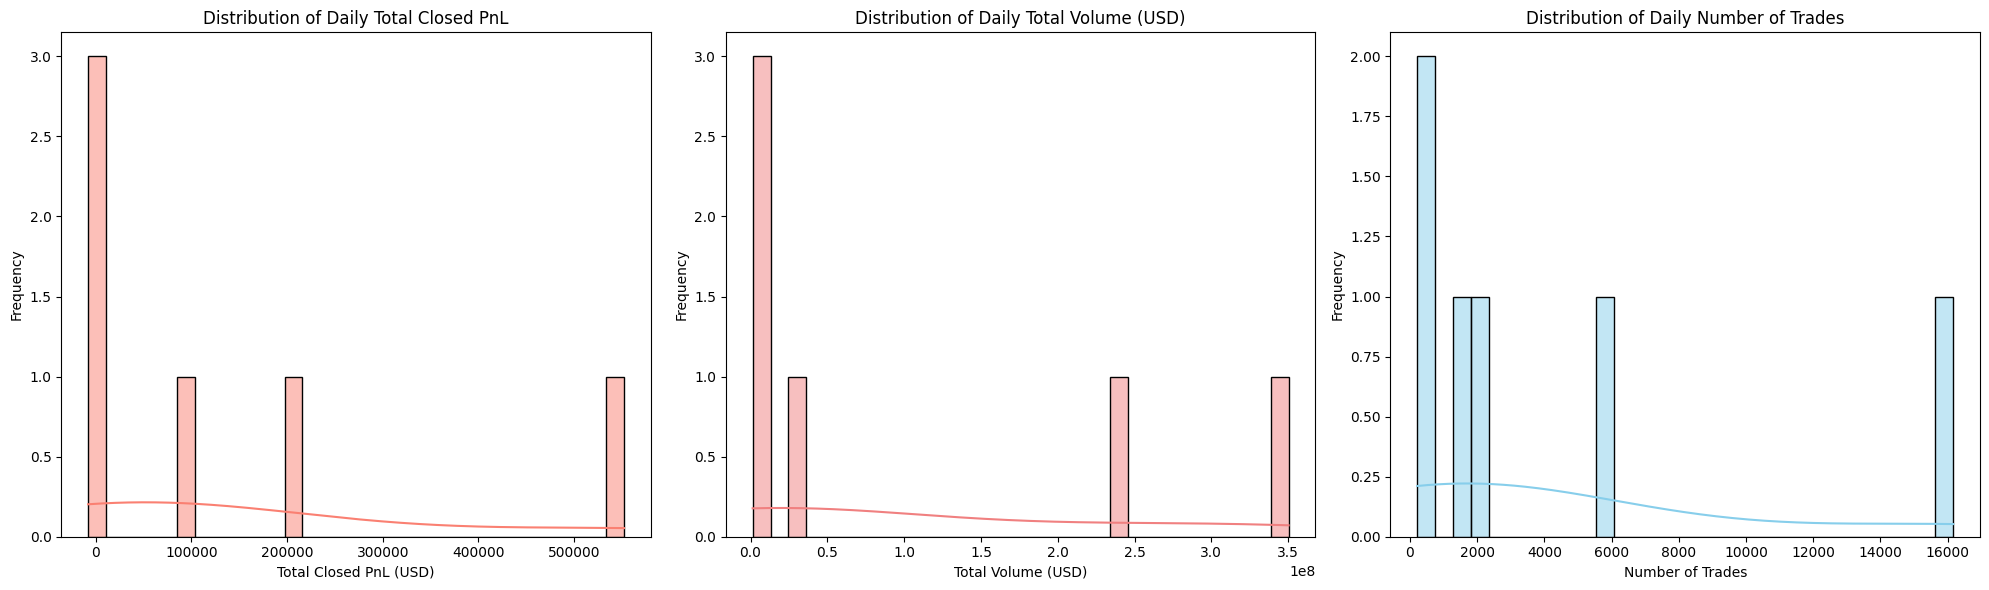

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(daily_trader_data['total_closedPnL'], bins=30, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Distribution of Daily Total Closed PnL')
axes[0].set_xlabel('Total Closed PnL (USD)')
axes[0].set_ylabel('Frequency')

sns.histplot(daily_trader_data['total_volume_usd'], bins=30, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Daily Total Volume (USD)')
axes[1].set_xlabel('Total Volume (USD)')
axes[1].set_ylabel('Frequency')

# YOUR SNIPPET STARTS HERE
sns.histplot(daily_trader_data['num_trades'], bins=30, kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of Daily Number of Trades')
axes[2].set_xlabel('Number of Trades')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


The number of trades with low value are frequent, similarly the total volume of trade is low most of the time, total profit is also low most of the time.

In [ ]:
# Using an 'inner' merge to keep only the dates present in BOTH dataframes.
# This ensures that for every data point, you have both sentiment and trading data.
merged_df = pd.merge(sentiment_df, df1_btc, left_index=True, right_index=True, how='inner')

In [ ]:
merged_df

,value,classification,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,buy_volume,sell_volume,is_long_position,is_short_position
date_datetime,,,,,,,,,,,,,,,,,,,,
2023-11-14,69,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,0.00000,Open Short,0.000000,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,0.157001,1.070000e+15,0.00,628.00,0,1
2023-11-14,69,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,-0.01500,Open Short,0.000000,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,6.092654,2.830000e+14,0.00,24370.62,0,1
2023-11-14,69,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42748.0,0.01500,641.22,BUY,-0.59711,Close Short,-13.230000,0xaa5402f2a57de3b0357b04068cff0e0112004938d7f4...,4626056690,True,0.160305,8.320000e+14,641.22,0.00,0,1
2023-11-14,69,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42749.0,0.58211,24884.62,BUY,-0.58211,Close Short,-514.003130,0xaa5402f2a57de3b0357b04068cff0e0112004938d7f4...,4626056690,True,6.221155,4.890000e+14,24884.62,0.00,0,1
2023-11-14,69,Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,43774.0,0.05955,2606.74,BUY,0.00000,Open Long,0.000000,0x6d901f79f65401f02d3b0406b627d901a0003aacd22d...,5134343098,True,0.651685,9.390000e+14,2606.74,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19,44,Fear,0x271b280974205ca63b716753467d5a371de622ab,BTC,82541.0,0.06057,4999.51,BUY,-4.23382,Close Short,7.135146,0x876a3f10cea0ca9085b904213da8c201e100a504bb95...,85455572778,True,1.439857,1.570000e+14,4999.51,0.00,0,1
2025-02-19,44,Fear,0x271b280974205ca63b716753467d5a371de622ab,BTC,82541.0,0.02500,2063.53,BUY,-4.17325,Close Short,2.945000,0x876a3f10cea0ca9085b904213da8c201e100a504bb95...,85455572778,True,0.594294,9.040000e+14,2063.53,0.00,0,1
2025-02-19,44,Fear,0x271b280974205ca63b716753467d5a371de622ab,BTC,82541.0,0.27535,22727.66,BUY,-4.14825,Close Short,32.436230,0x876a3f10cea0ca9085b904213da8c201e100a504bb95...,85455572778,True,6.545567,8.490000e+14,22727.66,0.00,0,1


In [ ]:
merged_df.isnull().sum()

,0
value,0
classification,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Start Position,0
Direction,0


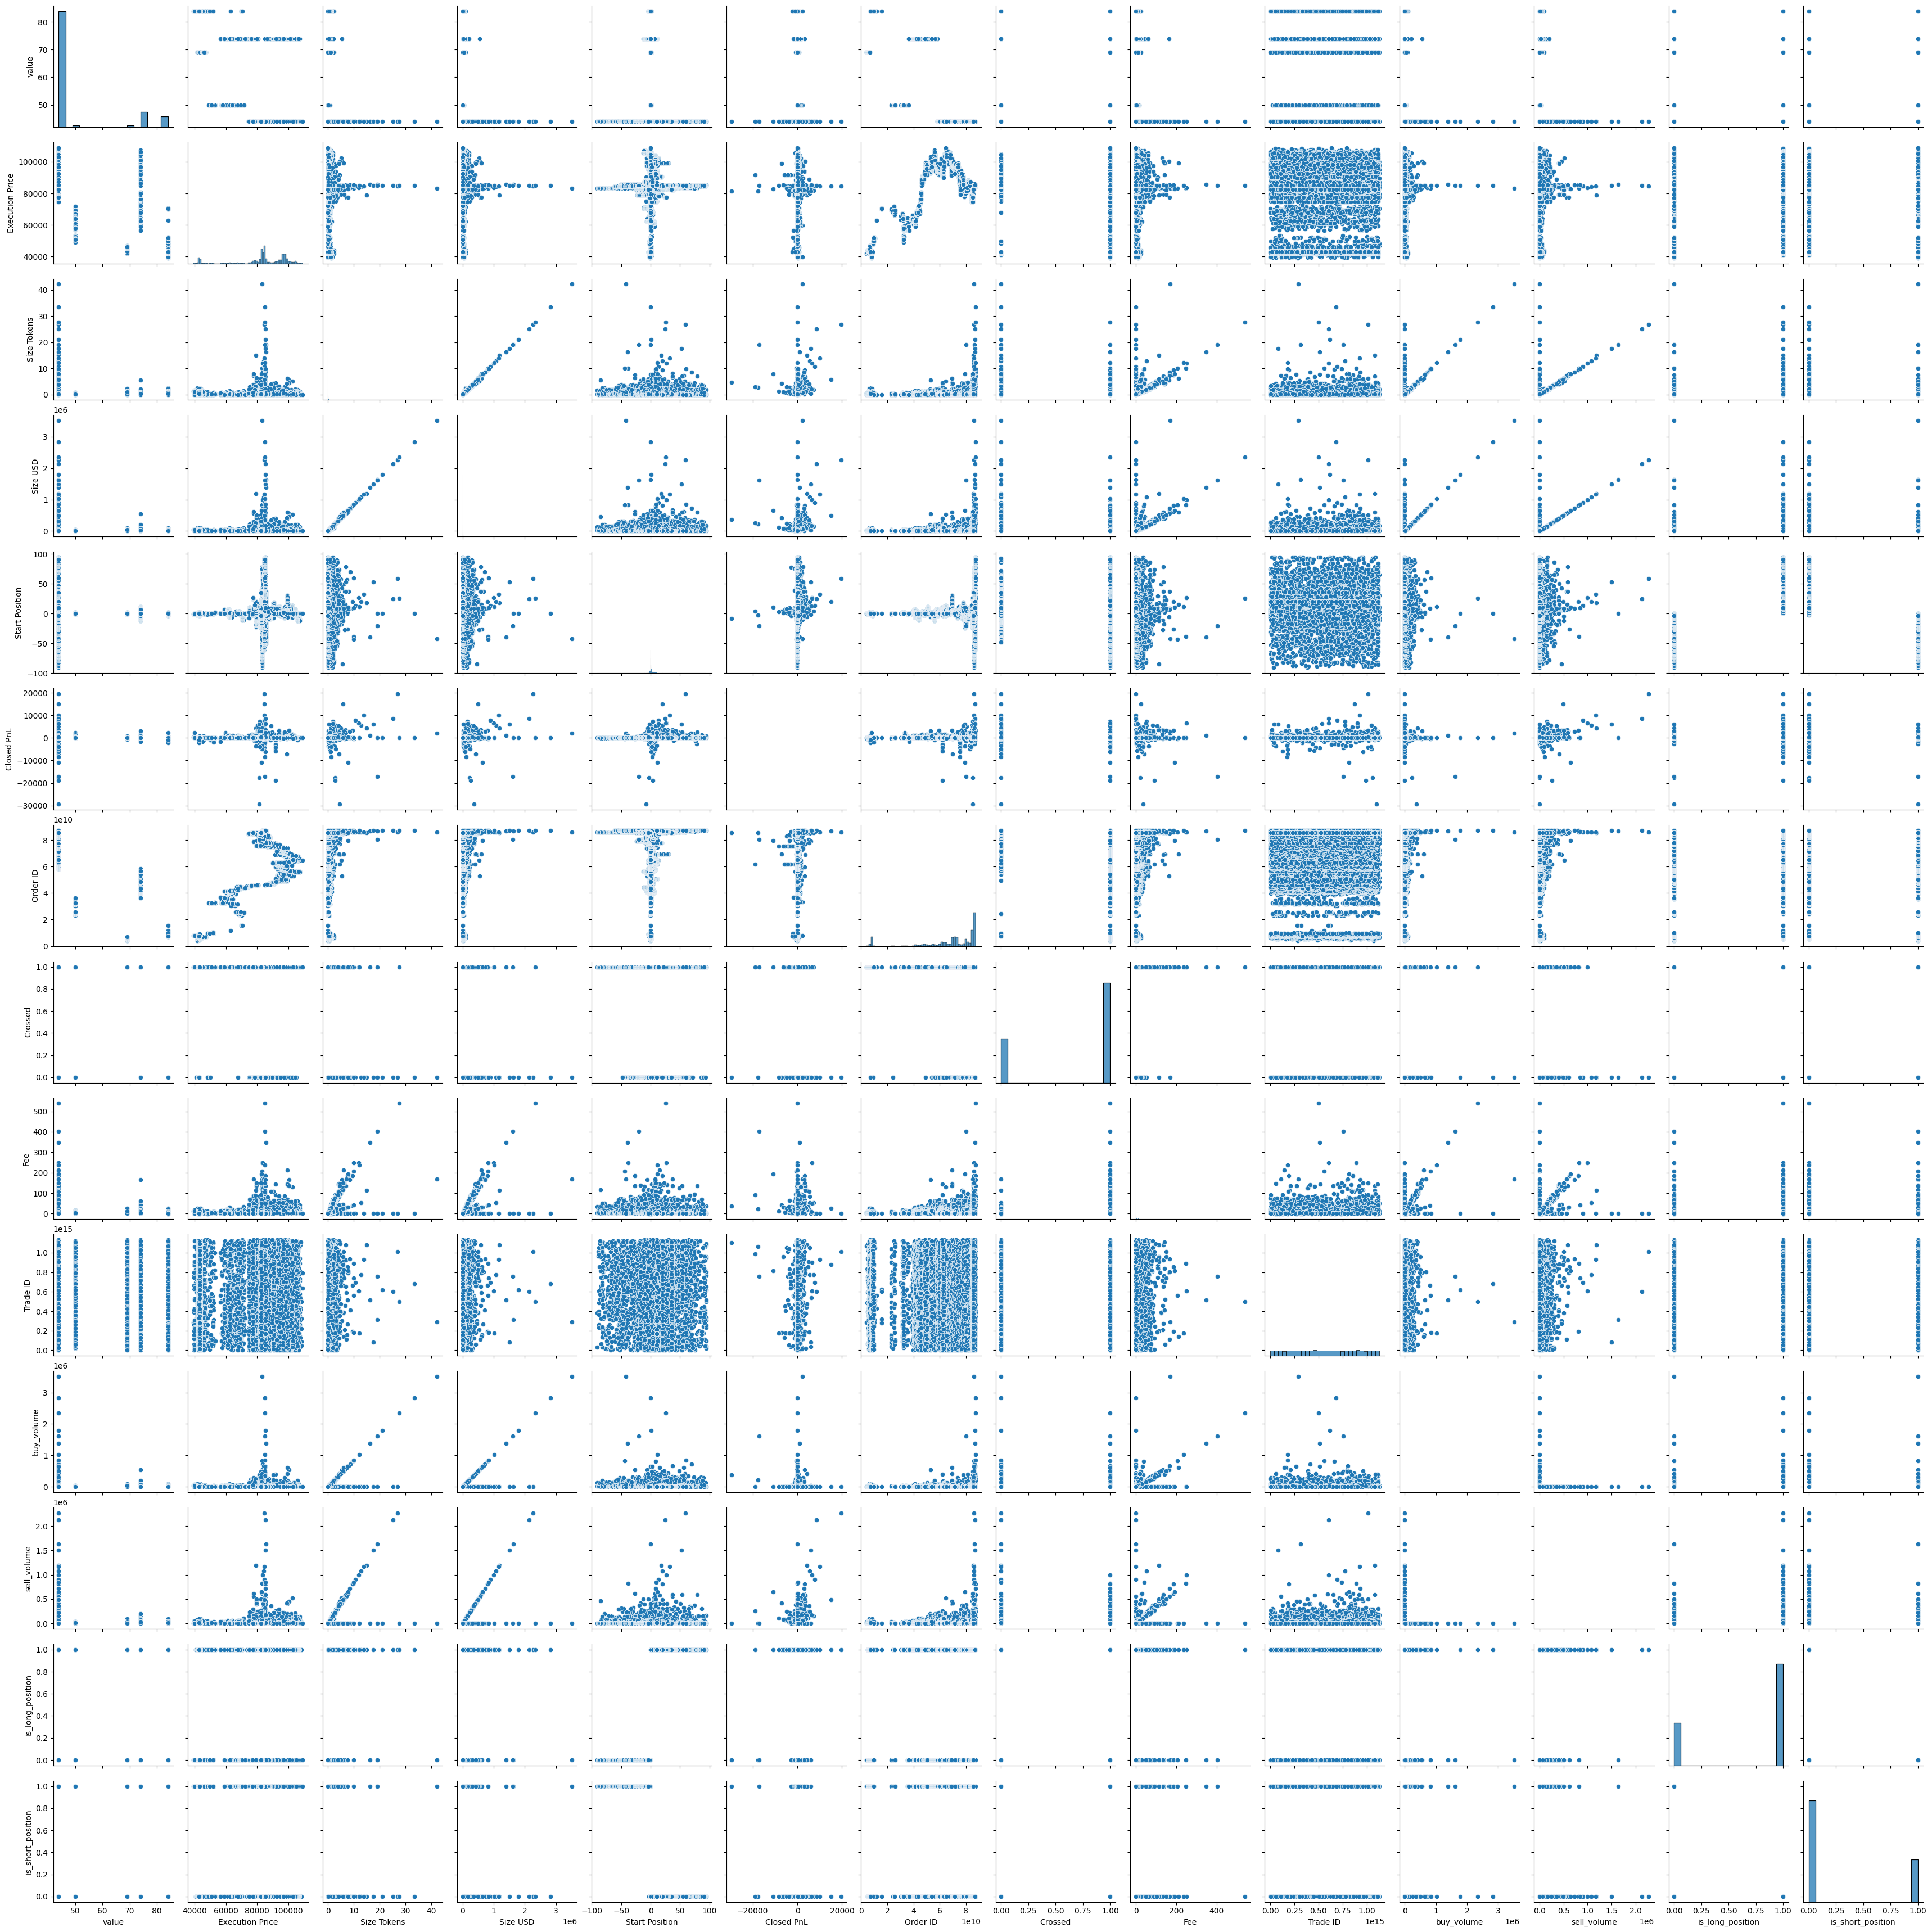

In [104]:
sns.pairplot(merged_df)


In [106]:
daily_aggregated_merged_df = merged_df.groupby('date_datetime').agg(
        sentiment_value=('value', 'first'),
        sentiment_classification=('classification', 'first'),

        total_closedPnL=('Closed PnL', 'sum'),
        total_volume_usd=('Size USD', 'sum'),
        num_trades=('Transaction Hash', 'count'),
        avg_execution_price=('Execution Price', 'mean'),
        total_fees=('Fee', 'sum'),
        num_unique_traders=('Account', 'nunique'),
        total_buy_volume_usd=('buy_volume', 'sum'),
        total_sell_volume_usd=('sell_volume', 'sum'),
        total_long_positions=('is_long_position', 'sum'),
        total_short_positions=('is_short_position', 'sum')
    ).reset_index()

In [107]:
daily_aggregated_merged_df

,date_datetime,sentiment_value,sentiment_classification,total_closedPnL,total_volume_usd,num_trades,avg_execution_price,total_fees,num_unique_traders,total_buy_volume_usd,total_sell_volume_usd,total_long_positions,total_short_positions
0,2023-11-14,69,Greed,530.655361,4.654492e+06,227,44601.356828,1163.161618,2,2.350048e+06,2.304444e+06,145,82
1,2024-03-09,84,Extreme Greed,-7853.421683,1.157254e+07,1451,43271.386630,2266.309260,3,5.790077e+06,5.782465e+06,341,1102
2,2024-07-03,50,Neutral,10485.300779,1.375887e+06,217,63454.013825,481.310018,2,6.827009e+05,6.931859e+05,162,55
3,2024-10-27,74,Greed,104034.937427,3.370609e+07,2072,88207.968147,10698.960668,10,1.714417e+07,1.656192e+07,1318,753
4,2025-02-19,44,Fear,552113.840180,3.503168e+08,16168,89162.886813,78999.268530,18,1.784517e+08,1.718651e+08,12237,3921


In [108]:
from scipy.stats import pearsonr
import os

In [109]:
correlation_columns_for_analysis = [
        'sentiment_value',
        'total_closedPnL',
        'total_volume_usd',
        'num_trades',
        'num_unique_traders',
        'total_fees',
        'avg_execution_price',
        'total_buy_volume_usd',
        'total_sell_volume_usd',
        'total_long_positions',
        'total_short_positions'
    ]


--- Correlation Matrix (Daily Aggregated Numerical Columns) ---
                       sentiment_value  total_closedPnL  total_volume_usd  \
sentiment_value               1.000000        -0.651506         -0.642360   
total_closedPnL              -0.651506         1.000000          0.992888   
total_volume_usd             -0.642360         0.992888          1.000000   
num_trades                   -0.610923         0.990667          0.998633   
num_unique_traders           -0.480054         0.949805          0.914499   
total_fees                   -0.636751         0.996684          0.999166   
avg_execution_price          -0.510863         0.718437          0.633312   
total_buy_volume_usd         -0.642624         0.992921          1.000000   
total_sell_volume_usd        -0.642086         0.992854          1.000000   
total_long_positions         -0.648722         0.994515          0.999865   
total_short_positions        -0.471938         0.953820          0.970084   

          

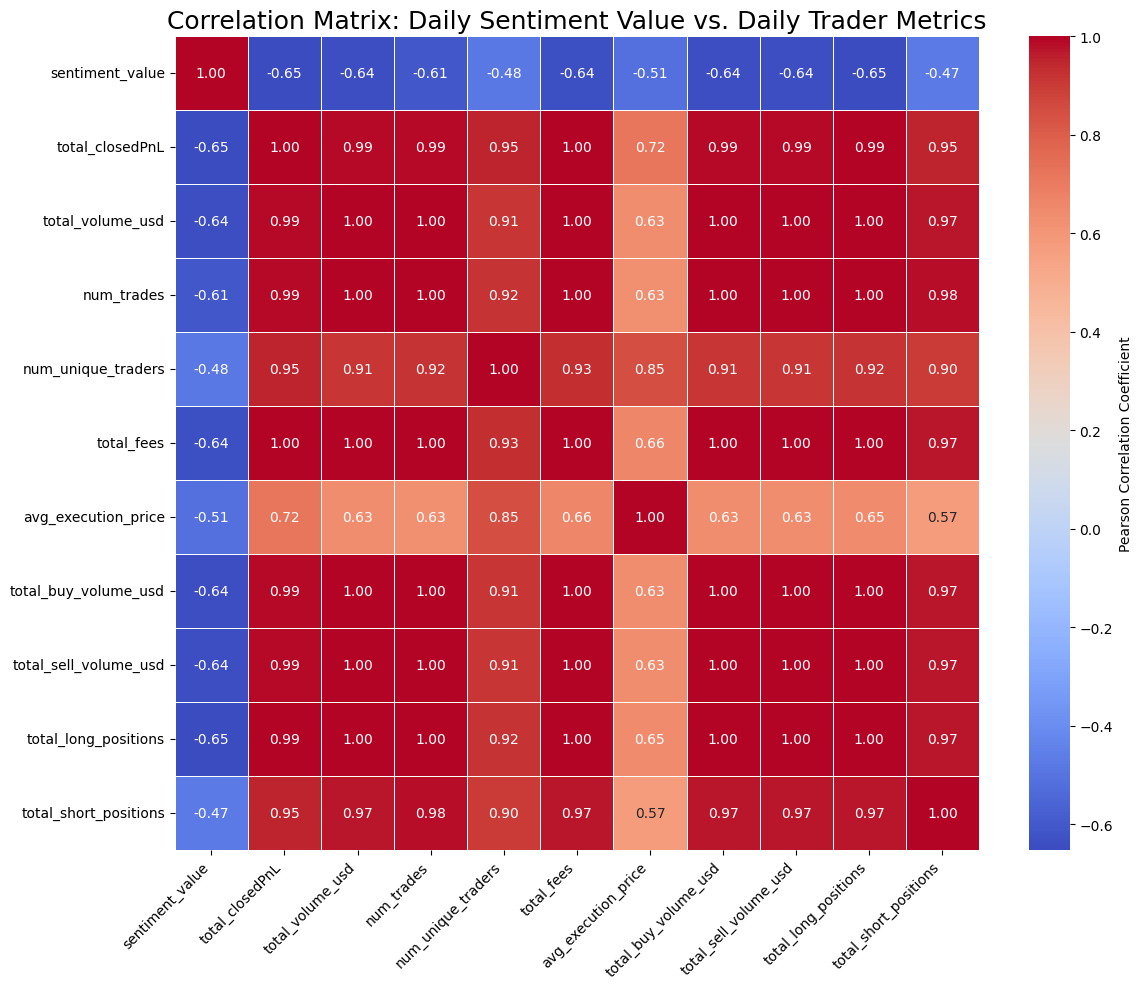

In [110]:
available_columns_for_corr = [
        col for col in correlation_columns_for_analysis
        if col in daily_aggregated_merged_df.columns and pd.api.types.is_numeric_dtype(daily_aggregated_merged_df[col])
    ]

if not available_columns_for_corr:
    print("\nNo numeric columns available for correlation analysis. Check if required aggregated columns exist and are numeric.")
else:
    print("\n--- Correlation Matrix (Daily Aggregated Numerical Columns) ---")
    correlation_matrix = daily_aggregated_merged_df[available_columns_for_corr].corr()
    print(correlation_matrix)

    # Plotting the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Pearson Correlation Coefficient'})
    plt.title('Correlation Matrix: Daily Sentiment Value vs. Daily Trader Metrics', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.show()

Interpretation:
1. This is a crucial finding. It suggests that as the sentiment_value decreases (perhaps indicating more "fear" or negative sentiment), trading activity (volume, trades, fees), profitability (total_closedPnL), and the number of participants (num_unique_traders) tend to increase. Conversely, as sentiment_value increases (more "greed" or positive sentiment), these trading metrics tend to decrease. This could imply that periods of market uncertainty or negative sentiment (which might drive more activity due to volatility or panic selling/buying) lead to higher trading volumes and PnL, or that the sentiment measure itself is inversely related to market activity and profitability.

2. Higher trading volume, more trades, more unique traders, and higher fees are all very strongly associated with higher total_closedPnL. This indicates that periods of increased market activity generally translate to higher overall profits (or perhaps larger losses, but the positive correlation suggests gains dominate). The positive correlation with avg_execution_price implies that higher prices might also contribute to profitability.

3. Volume and Activity Metrics : These metrics are all extremely highly correlated with each other (close to 1.0).This indicates that these variables are essentially measuring the same underlying phenomenon: the overall level of trading activity. When one of these increases, all others tend to increase proportionally. total_volume_usd is practically identical to its buy/sell components, as expected. The very strong correlation between total_long_positions and total_short_positions with num_trades suggests that both types of positions contribute significantly to the total trade count.

4. num_unique_traders:

    Shows a strong positive correlation with all activity metrics (volume, trades, fees) and total_closedPnL (e.9., 0.919971 with num_trades, 0.949805 with total_closedPnL).

    Has a very strong positive correlation with avg_execution_price: 0.847601.

    Interpretation: More unique traders participating in the market are strongly associated with higher activity, higher profitability, and also higher average execution prices. This could suggest that periods of market growth or strong performance attract more participants.

5. avg_execution_price:

    Shows a strong positive correlation with total_closedPnL (0.718437) and num_unique_traders (0.847601).

    Has a moderate positive correlation with volume/trade metrics (e.g., 0.633312 with total_volume_usd).

    Interpretation: Higher average execution prices tend to coincide with higher overall profitability and a greater number of unique traders. This might indicate that upward price movements are attractive to traders and can contribute to overall positive PnL for the aggregated data.


In [111]:
 print("\n--- Specific Pearson Correlations with Daily Sentiment Value ---")
 if 'sentiment_value' in daily_aggregated_merged_df.columns and pd.api.types.is_numeric_dtype(daily_aggregated_merged_df['sentiment_value']):
     specific_corr_targets = ['total_closedPnL', 'total_volume_usd', 'num_trades', 'total_long_positions', 'total_short_positions']
     for col in specific_corr_targets:
         if col in daily_aggregated_merged_df.columns and pd.api.types.is_numeric_dtype(daily_aggregated_merged_df[col]):
             # Drop rows with NaN in the current pair for accurate correlation
             temp_df = daily_aggregated_merged_df[[col, 'sentiment_value']].dropna()
             if not temp_df.empty:
                 corr, p_value = pearsonr(temp_df['sentiment_value'], temp_df[col])
                 print(f"Correlation between Daily Sentiment Value and {col}: {corr:.3f} (p-value: {p_value:.3f})")
             else:
                 print(f"Not enough non-null data for correlation between Daily Sentiment Value and {col}.")
         else:
                 print(f"Column '{col}' not found or is not numeric for specific correlation.")
 else:
             print("Sentiment 'sentiment_value' column not found or is not numeric in the DataFrame.")



--- Specific Pearson Correlations with Daily Sentiment Value ---
Correlation between Daily Sentiment Value and total_closedPnL: -0.652 (p-value: 0.234)
Correlation between Daily Sentiment Value and total_volume_usd: -0.642 (p-value: 0.242)
Correlation between Daily Sentiment Value and num_trades: -0.611 (p-value: 0.274)
Correlation between Daily Sentiment Value and total_long_positions: -0.649 (p-value: 0.236)
Correlation between Daily Sentiment Value and total_short_positions: -0.472 (p-value: 0.422)


While the Pearson correlation coefficients themselves suggest interesting negative relationships (meaning lower sentiment values tend to coincide with higher trading activity, volume, and PnL), the high p-values for all these correlations are critical.

The most important takeaway is that none of these observed correlations are statistically significant at a conventional significance level (e.g., α=0.05).

This implies-

    Small Sample Size or High Variability: The lack of statistical significance could be due to a relatively small number of data points (daily aggregates) used for the correlation calculation, or high variability within the data. With more data, these patterns might emerge as significant.

    Chance Occurrence: The observed relationships, while appearing moderately strong, could simply be due to random chance within the limited data available.

    No Strong Linear Predictive Power (yet): Based solely on this analysis, you cannot reliably use daily sentiment value to linearly predict changes in total PnL, volume, or number of trades.

In [112]:
print("\n--- Total/Average Trader Metrics by Daily Sentiment Classification ---")
if 'sentiment_classification' in daily_aggregated_merged_df.columns and not daily_aggregated_merged_df['sentiment_classification'].empty:
    # Define the order for sentiment classifications for consistent plotting
    classification_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    daily_aggregated_merged_df['sentiment_classification'] = pd.Categorical(
    daily_aggregated_merged_df['sentiment_classification'], categories=classification_order, ordered=True
        )

        # Define aggregations for each metric by classification
    agg_cols_for_classification = {
          'Total_PnL_in_Category': ('total_closedPnL', 'sum'),
            'Total_Volume_in_Category': ('total_volume_usd', 'sum'),
            'Total_Trades_in_Category': ('num_trades', 'sum'),
            'Total_Buy_Volume_in_Category': ('total_buy_volume_usd', 'sum'),
            'Total_Sell_Volume_in_Category': ('total_sell_volume_usd', 'sum'),
            'Total_Long_Positions_in_Category': ('total_long_positions', 'sum'),
            'Total_Short_Positions_in_Category': ('total_short_positions', 'sum'),
            'Avg_Daily_Execution_Price_in_Category': ('avg_execution_price', 'mean'),
            'Avg_Daily_Unique_Traders_in_Category': ('num_unique_traders', 'mean')
        }


--- Total/Average Trader Metrics by Daily Sentiment Classification ---


In [113]:
# Filter for only valid columns that exist and are numeric in the DataFrame
valid_agg_cols_for_classification = {
k: v for k, v in agg_cols_for_classification.items()
if v[0] in daily_aggregated_merged_df.columns and pd.api.types.is_numeric_dtype(daily_aggregated_merged_df[v[0]])
        }

if valid_agg_cols_for_classification:
    # Group by sentiment classification and apply aggregations
    grouped_by_classification = daily_aggregated_merged_df.groupby('sentiment_classification').agg(**valid_agg_cols_for_classification)
    # Reindex to ensure all classification categories are present, even if empty
    grouped_by_classification = grouped_by_classification.reindex(classification_order)
    print(grouped_by_classification)


                          Total_PnL_in_Category  Total_Volume_in_Category  \
sentiment_classification                                                    
Extreme Fear                           0.000000              0.000000e+00   
Fear                              552113.840180              3.503168e+08   
Neutral                            10485.300779              1.375887e+06   
Greed                             104565.592788              3.836058e+07   
Extreme Greed                      -7853.421683              1.157254e+07   

                          Total_Trades_in_Category  \
sentiment_classification                             
Extreme Fear                                     0   
Fear                                         16168   
Neutral                                        217   
Greed                                         2299   
Extreme Greed                                 1451   

                          Total_Buy_Volume_in_Category  \
sentiment_classificatio

/tmp/ipython-input-113-4137070167.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_classification = daily_aggregated_merged_df.groupby('sentiment_classification').agg(**valid_agg_cols_for_classification)


/tmp/ipython-input-114-1778593127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_by_classification.index, y=grouped_by_classification['Total_PnL_in_Category'], palette='coolwarm')


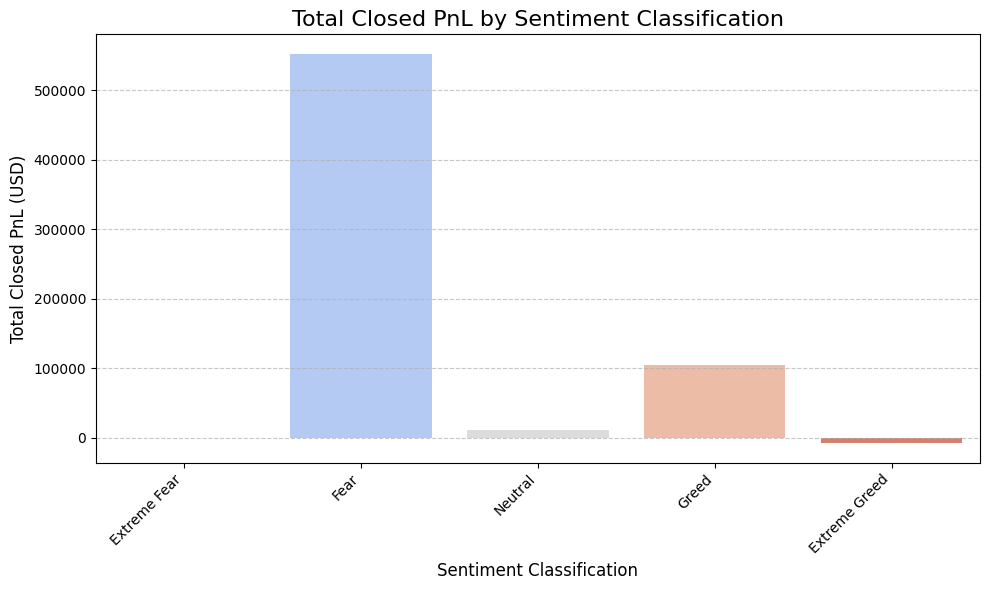

/tmp/ipython-input-114-1778593127.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_by_classification.index, y=grouped_by_classification['Total_Volume_in_Category'], palette='viridis')


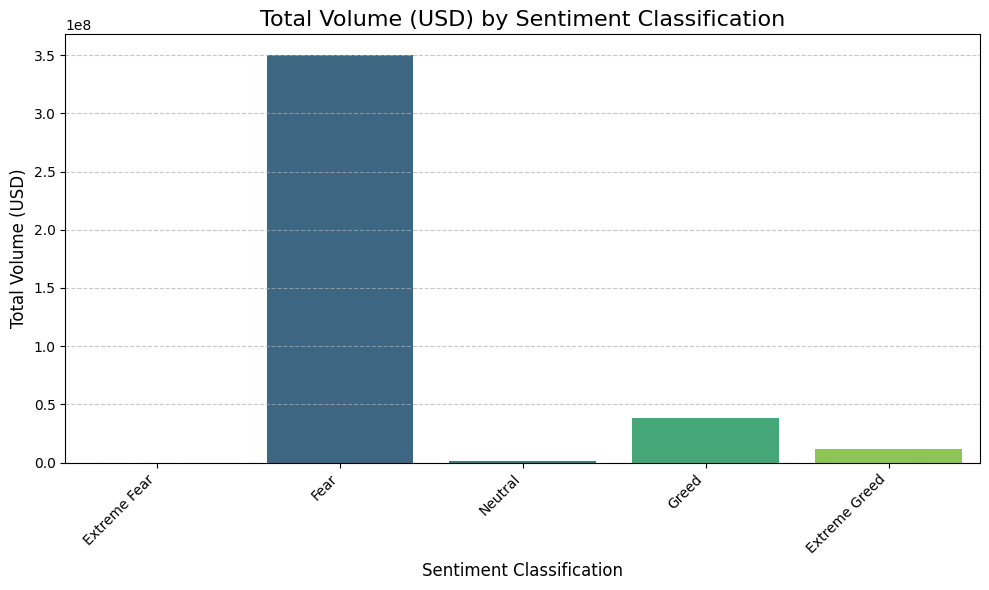

In [114]:
# --- Visualizations by Sentiment Classification ---

            # Plot Total PnL by classification
if 'Total_PnL_in_Category' in grouped_by_classification.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=grouped_by_classification.index, y=grouped_by_classification['Total_PnL_in_Category'], palette='coolwarm')
    plt.title('Total Closed PnL by Sentiment Classification', fontsize=16)
    plt.xlabel('Sentiment Classification', fontsize=12)
    plt.ylabel('Total Closed PnL (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

# Plot Total Volume by classification
if 'Total_Volume_in_Category' in grouped_by_classification.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=grouped_by_classification.index, y=grouped_by_classification['Total_Volume_in_Category'], palette='viridis')
    plt.title('Total Volume (USD) by Sentiment Classification', fontsize=16)
    plt.xlabel('Sentiment Classification', fontsize=12)
    plt.ylabel('Total Volume (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

The above graphs indicate that total volume and total profits are mostly influenced by Fear and greed and least influenced by Extreme and neutral sentiments.

The sentiment 'fear' generates the most volume and most profits in the market.

Total Analysis: Sentiment-Driven Trading Dynamics

Executive Summary:

The analysis reveals a fascinating and often counter-intuitive relationship between market sentiment and trading outcomes. While a "Fear" sentiment category drives the highest trading activity, volume, and significant aggregated profitability, "Extreme Greed" paradoxically leads to net losses, possibly due to fewer but highly active traders getting caught in unfavorable market conditions. Traditional correlations between sentiment and market activity are observed to be negative, but lack statistical significance with the current dataset size.

Detailed Analysis:

    Overall Sentiment Landscape:

        The market sentiment, as classified, is predominantly characterized by Fear (29.54%) and Greed (23.94%), together accounting for over half of the observations.

        "Extreme Fear" and "Extreme Greed" are less frequent (19.21% and 12.33% respectively), while "Neutral" sentiment is the least common (14.98%).

    Activity & Profitability Driven by "Fear" (The Paradox):

        Highest PnL & Activity: Despite its name, the "Fear" sentiment category is associated with the largest total closed PnL (552.11K), the highest total trading volume (350.32M), and the most trades (16,168).

        Highest Participation: This category also attracts the most unique traders (average of 18.0 daily).

        Long Bias: A significant majority of positions during "Fear" are long (12,237 long vs. 3,921 short), indicating traders might be buying into perceived dips or anticipating rebounds amidst volatility.

        Interpretation: This suggests that periods of market volatility and uncertainty, often characterized by "Fear," create the most dynamic trading environments, attracting a large number of participants and generating the highest aggregated returns. Opportunities arise from rapid price movements, which astute traders can capitalize on.

    The "Extreme Greed" Anomaly (Loss-Making Extremism):

        Net Losses: Crucially, "Extreme Greed" is the only sentiment category that resulted in a net loss (−7,853.42).

        Significant Activity, Low Participation: Despite the loss, it still generated substantial volume (11.57M) and trades (1,451). However, this activity is driven by a relatively low average number of unique traders (only 3.0 daily).

        Dominant Short Positions: Unlike all other profitable categories, "Extreme Greed" exhibits a striking reversal in position bias, with short positions (1,102) significantly outnumbering long positions (341).

        Lowest Execution Price: The average execution price in this category (43,271.39) is the lowest among all sentiments.

        Interpretation: This is a strong indicator that "Extreme Greed" periods might represent market tops where excessive optimism from some leads to overextended positions, attracting contrarian short-sellers who eventually cause a downturn. The losses suggest that either the few dominant long traders get caught in reversals, or the short-selling activity itself leads to net losses for the aggregated group during these specific "greedy" periods. It highlights the dangers of chasing market highs.

    Neutral and Greed (Measured Activity):

        Neutral: As expected, "Neutral" periods are characterized by the lowest non-zero activity across all metrics (volume, trades, PnL, unique traders). It's a relatively calm market state.

        Greed: This category shows healthy activity and profitability (second highest PnL: 104.57K), attracting a moderate number of unique traders (average 6.0). It's a period of positive sentiment with clear long-position dominance, but not as intensely active or profitable as "Fear."

    Correlation Matrix Insights (and Statistical Caveats):

        Negative Correlation with Sentiment: sentiment_value generally shows moderate to strong negative correlations with all trading activity and profitability metrics (e.g., -0.652 with PnL, -0.642 with volume). This supports the observation that lower sentiment (more fear) is linked to higher activity.

        High Inter-Correlation among Trading Metrics: All activity-related metrics (volume, trades, fees, long/short positions, unique traders, PnL) are highly positively correlated with each other (often > 0.9). This confirms they are measuring the same underlying market vigor.

        Lack of Statistical Significance: Crucially, despite the seemingly strong correlation coefficients involving sentiment_value, none of these correlations are statistically significant (all p-values > 0.05). This is likely due to the small number of daily data points used for the correlation calculation, meaning the observed patterns could be due to random chance rather than a true underlying relationship.

Recommendations:

Based on this analysis, here are some recommendations:

    Investigate "Fear" Sentiment Periods:

        Recommendation: Focus on understanding the specific triggers and dynamics during "Fear" sentiment periods. Since these are associated with the highest PnL and activity, they present the most significant aggregated opportunities.

        Action: Analyze the price action (volatility, drawdowns, rebounds) during these "Fear" periods. Identify what types of assets or strategies perform best.

    Be Cautious During "Extreme Greed":

        Recommendation: Treat "Extreme Greed" periods as a potential warning sign. Given they are the only category with net losses and involve fewer unique traders with a shift towards short interest, they might represent market inflection points.

        Action: Consider adopting a more defensive or contrarian strategy during such times. Look for signs of market overextension or reversals if you are trading.

    Data Expansion & Validation:

        Recommendation: To confirm the observed correlations, especially the intriguing negative relationship with sentiment_value, collect significantly more daily aggregated data points.

        Action: Extend the historical data range if possible. A larger dataset will increase the statistical power and allow for more confident conclusions about correlations.

    Deep Dive into Sentiment Classification:

        Recommendation: Gain a deeper understanding of how sentiment_classification is derived.

        Action: Explore the methodology behind the sentiment score. Does "Fear" truly capture volatility-driven opportunities, or is it a specific type of fear? This context can refine trading strategies.

    Explore Causal Relationships:

        Recommendation: While correlation is observed, it doesn't imply causation. Future analysis could explore if sentiment causes changes in trading behavior or vice-versa.

        Action: Consider time-series analysis (e.g., Granger causality tests, lagged correlations) to investigate leading/lagging indicators between sentiment and market metrics.

    Granular Analysis of "Extreme Fear":

        Recommendation: Investigate why "Extreme Fear" shows zero activity.

        Action: Check if there are truly no data points for this classification or if transactions simply didn't occur during these states. Understanding this could reveal critical market illiquidity or extreme risk aversion.